In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from sklearn.metrics import mean_squared_error

In [3]:
# Load your dataset
data = pd.read_csv('us_weekly_gasoline.csv')
data['week_of'] = pd.to_datetime(data['week_of'])

# Sort by date
data = data.sort_values(by='week_of')

# Fill null values with the mean of one value above and one value below
data['price'] = data['price'].fillna((data['price'].shift() + data['price'].shift(-1)) / 2)

# Fill any remaining null values at the beginning and end
data['price'].fillna(method='bfill', inplace=True)
data['price'].fillna(method='ffill', inplace=True)



In [4]:
# Sort by date
data = data.sort_values(by='week_of')


In [5]:
# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]


In [6]:
# Prepare the data for a simple feedforward neural network
X_train = train['price'].values
y_train = X_train[1:]  # Target is the next value
X_train = X_train[:-1]  # Remove the last value

X_test = test['price'].values
y_test = X_test[1:]  # Target is the next value
X_test = X_test[:-1]  # Remove the last value


In [7]:
# Reshape the data to fit LSTM and GRU input shape
X_train = X_train.reshape(-1, 1, 1)
X_test = X_test.reshape(-1, 1, 1)

In [8]:
# Build an LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, 1), activation='relu'))
lstm_model.add(Dense(1, activation='linear'))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
50/50 [==============================] - 3s 4ms/step - loss: 1811.8668
Epoch 2/50
50/50 [==============================] - 0s 5ms/step - loss: 435.6548
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 18.4185
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 13.8309
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 11.5426
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 9.3680
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 7.5093
Epoch 8/50
50/50 [==============================] - 0s 3ms/step - loss: 6.1512
Epoch 9/50
50/50 [==============================] - 0s 3ms/step - loss: 5.1816
Epoch 10/50
50/50 [==============================] - 0s 4ms/step - loss: 4.7195
Epoch 11/50
50/50 [==============================] - 0s 5ms/step - loss: 4.3934
Epoch 12/50
50/50 [==============================] - 0s 4ms/step - loss: 4.2385
Epoch 13/50
50/50 [======================

In [9]:
# Build a GRU model
gru_model = Sequential()
gru_model.add(GRU(64, input_shape=(1, 1), activation='relu'))
gru_model.add(Dense(1, activation='linear'))

gru_model.compile(loss='mean_squared_error', optimizer='adam')
gru_model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
50/50 [==============================] - 2s 4ms/step - loss: 1896.9750
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 615.1310
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 15.1543
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 6.4205
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 5.0599
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 4.5231
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 4.3017
Epoch 8/50
50/50 [==============================] - 0s 4ms/step - loss: 4.1843
Epoch 9/50
50/50 [==============================] - 0s 4ms/step - loss: 4.1443
Epoch 10/50
50/50 [==============================] - 0s 3ms/step - loss: 4.0931
Epoch 11/50
50/50 [==============================] - 0s 3ms/step - loss: 4.0943
Epoch 12/50
50/50 [==============================] - 0s 3ms/step - loss: 4.1131
Epoch 13/50
50/50 [========================

In [13]:
# Evaluate the models
lstm_pred = lstm_model.predict(X_test)
gru_pred = gru_model.predict(X_test)



13/13 [==============================] - 0s 3ms/step


In [14]:
# Calculate RMSE for LSTM and GRU
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))
gru_rmse = np.sqrt(mean_squared_error(y_test, gru_pred))

print("LSTM RMSE:", lstm_rmse)
print("GRU RMSE:", gru_rmse)

LSTM RMSE: 3.100447660989831
GRU RMSE: 3.087801025803096


In [15]:
from sklearn.metrics import r2_score

# Calculate R2 score for LSTM and GRU
lstm_r2 = r2_score(y_test, lstm_pred)
gru_r2 = r2_score(y_test, gru_pred)

print("LSTM R-squared:", lstm_r2)
print("GRU R-squared:", gru_r2)


LSTM R-squared: 0.9722785640656645
GRU R-squared: 0.9725042526866031


In [16]:
# Predict the next prices using both LSTM and GRU models
lstm_next_price = lstm_model.predict(X_test[-1].reshape(1, 1, 1))
gru_next_price = gru_model.predict(X_test[-1].reshape(1, 1, 1))

# The next predicted price for LSTM and GRU
lstm_next_price = lstm_next_price[0][0]
gru_next_price = gru_next_price[0][0]

print("Next LSTM Price:", lstm_next_price)
print("Next GRU Price:", gru_next_price)


1/1 [==============================] - 0s 29ms/step
Next LSTM Price: 85.14301
Next GRU Price: 85.30387


13/13 [==============================] - 0s 2ms/step


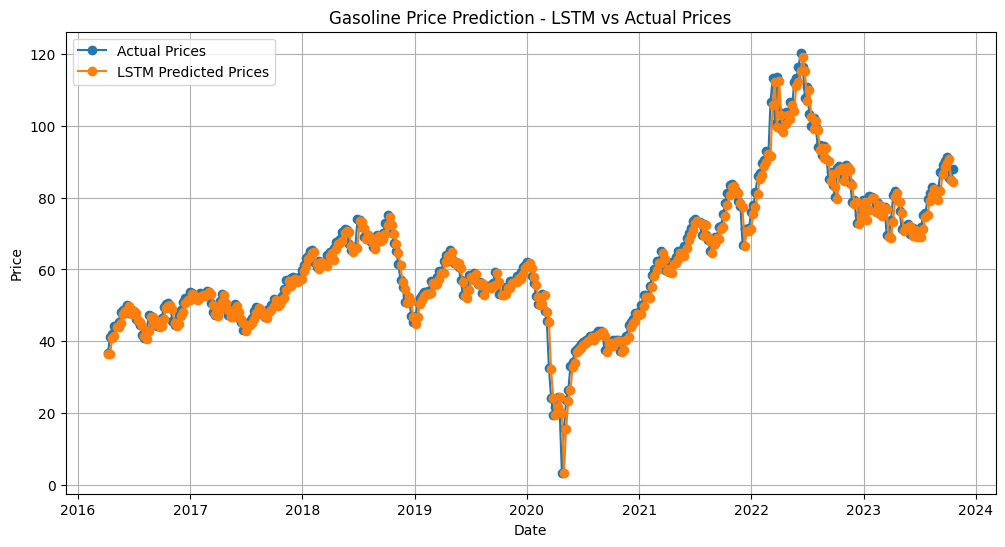

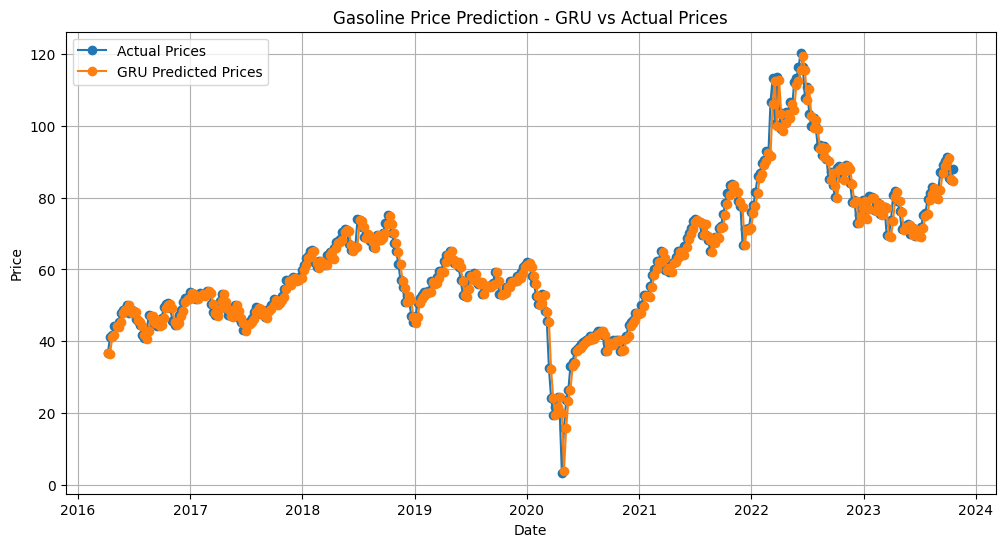

In [21]:
import matplotlib.pyplot as plt

# Predict the next prices using both LSTM and GRU models
lstm_next_price = lstm_model.predict(X_test)
gru_next_price = gru_model.predict(X_test)

# Prepare data for visualization
dates = test['week_of'].values[1:]  # Dates for the actual and predicted values

# Plot LSTM Predicted Prices vs. Actual Prices
plt.figure(figsize=(12, 6))
plt.plot(dates, y_test, label="Actual Prices", marker='o')
plt.plot(dates, lstm_next_price, label="LSTM Predicted Prices", marker='o')
plt.title('Gasoline Price Prediction - LSTM vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot GRU Predicted Prices vs. Actual Prices
plt.figure(figsize=(12, 6))
plt.plot(dates, y_test, label="Actual Prices", marker='o')
plt.plot(dates, gru_next_price, label="GRU Predicted Prices", marker='o')
plt.title('Gasoline Price Prediction - GRU vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


13/13 [==============================] - 0s 3ms/step


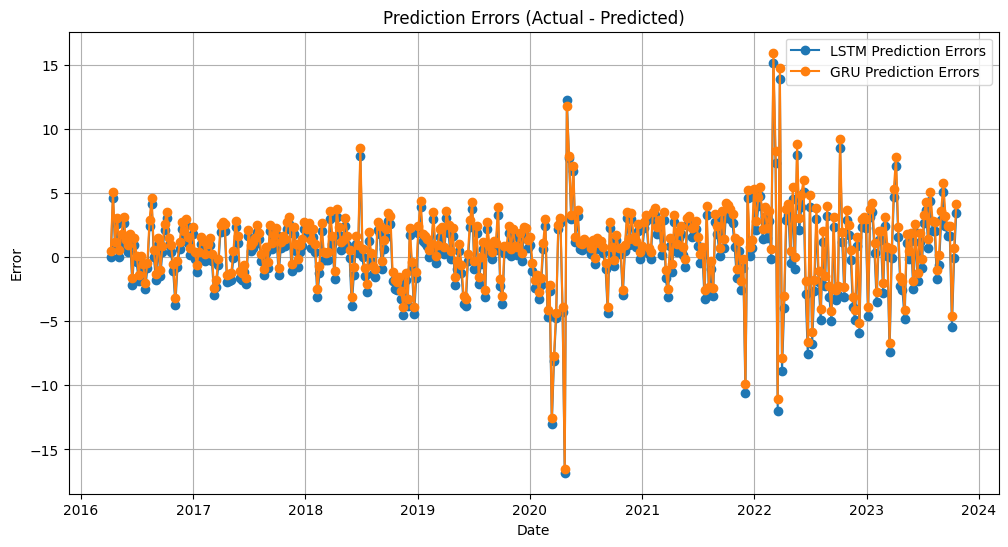

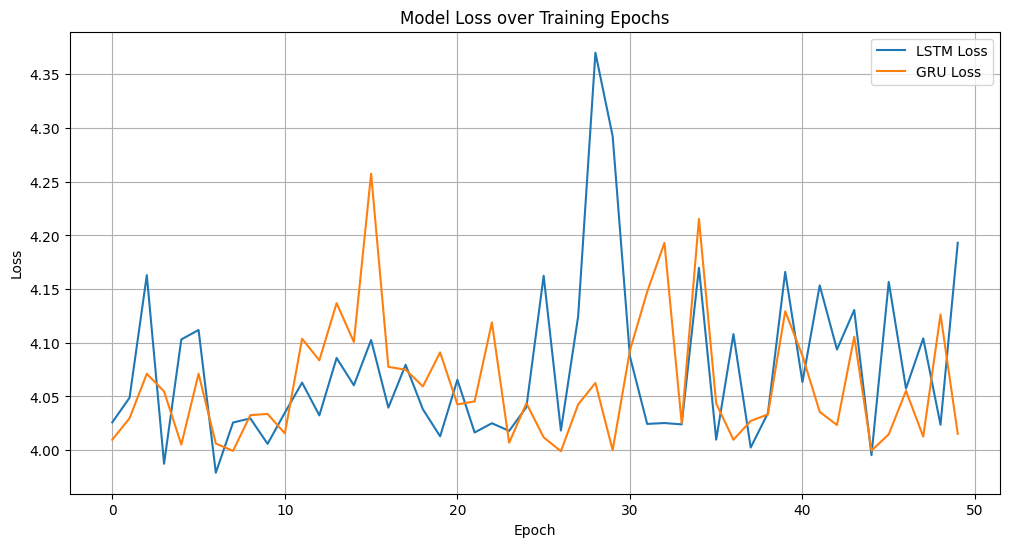

In [22]:
import matplotlib.pyplot as plt

# Train LSTM model and store the loss history
lstm_loss_history = []

for epoch in range(50):
    history = lstm_model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)
    lstm_loss_history.append(history.history['loss'][0])

# Train GRU model and store the loss history
gru_loss_history = []

for epoch in range(50):
    history = gru_model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)
    gru_loss_history.append(history.history['loss'][0])

# Predict the next prices using both LSTM and GRU models
lstm_next_price = lstm_model.predict(X_test)
gru_next_price = gru_model.predict(X_test)

# Prepare data for visualization
dates = test['week_of'].values[1:]  # Dates for the actual and predicted values

# Error Plot
lstm_errors = y_test - lstm_next_price.flatten()
gru_errors = y_test - gru_next_price.flatten()

plt.figure(figsize=(12, 6))
plt.plot(dates, lstm_errors, label="LSTM Prediction Errors", marker='o')
plt.plot(dates, gru_errors, label="GRU Prediction Errors", marker='o')
plt.title('Prediction Errors (Actual - Predicted)')
plt.xlabel('Date')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

# Model Loss Plot
plt.figure(figsize=(12, 6))
plt.plot(lstm_loss_history, label="LSTM Loss")
plt.plot(gru_loss_history, label="GRU Loss")
plt.title('Model Loss over Training Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

